 ## 👾 Loading Module

In [3]:
import cv2
import mediapipe as mp
import time
import os
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

## 🐠 Reading Image Path

In [4]:
def list_files(dir):
    r = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            r.append(os.path.join(root, name))
    return r

In [6]:
root="./jaffedbase"
image_path=sorted(list_files(root))
print(len(image_path))
print(image_path[0])

213
./jaffedbase/KA.AN1.39.tiff


##  🐳 Print a single image 

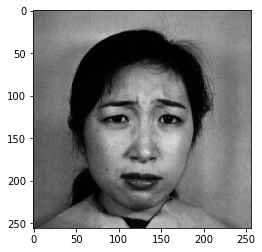

In [7]:
image=cv2.imread(image_path[3])
plt.imshow(image)
plt.show()

##  🦈  Face detection with mediapipe

xmin: 0.2244011014699936
ymin: 0.3558148145675659
width: 0.5579929947853088
height: 0.5579454302787781

(256, 256, 3)


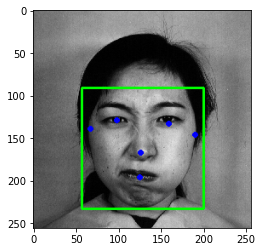

xmin: 0.20074525475502014
ymin: 0.34433749318122864
width: 0.572237491607666
height: 0.5722017288208008

(256, 256, 3)


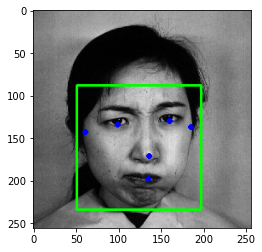

xmin: 0.2039986401796341
ymin: 0.34966549277305603
width: 0.5682264566421509
height: 0.5681866407394409

(256, 256, 3)


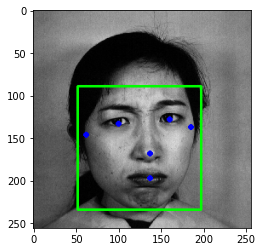

xmin: 0.1980091780424118
ymin: 0.3423512578010559
width: 0.5735177993774414
height: 0.5734781622886658

(256, 256, 3)


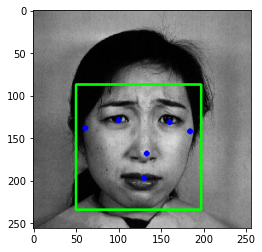

xmin: 0.20104405283927917
ymin: 0.3514634966850281
width: 0.5640634298324585
height: 0.5640258193016052

(256, 256, 3)


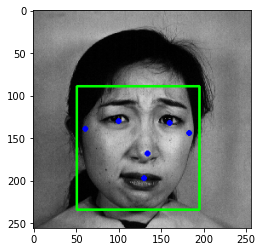

xmin: 0.18519645929336548
ymin: 0.35037723183631897
width: 0.5873467326164246
height: 0.5873098373413086

(256, 256, 3)


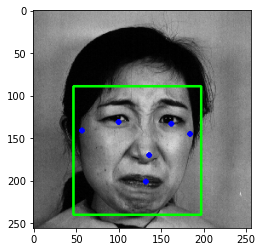

xmin: 0.22281238436698914
ymin: 0.3827964663505554
width: 0.5429598093032837
height: 0.5429099202156067

(256, 256, 3)


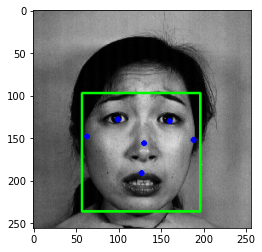

xmin: 0.19165083765983582
ymin: 0.35137292742729187
width: 0.5726257562637329
height: 0.5725904703140259

(256, 256, 3)


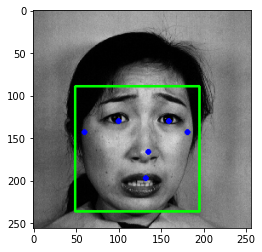

xmin: 0.20923760533332825
ymin: 0.3683422803878784
width: 0.5561189651489258
height: 0.5560768842697144

(256, 256, 3)


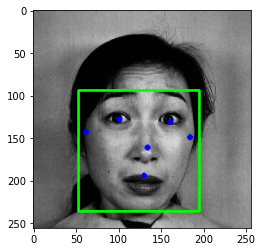

xmin: 0.23579345643520355
ymin: 0.3741811215877533
width: 0.5652443170547485
height: 0.5651910305023193

(256, 256, 3)


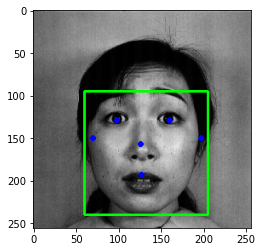

In [8]:
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

IMAGE_FILES = image_path[0:10]

with mp_face_detection.FaceDetection(
    min_detection_confidence=0.5) as face_detection:
    for idx, file in enumerate(IMAGE_FILES):
        image = cv2.imread(file)
        # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
        results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Draw face detections of each face.
        if not results.detections:
              continue
        annotated_image = image.copy()
        for detection in results.detections:
              mp_drawing.draw_detection(annotated_image, detection)
        print(detection.location_data.relative_bounding_box)
        print(annotated_image.shape)
        plt.imshow(annotated_image)
        plt.show()

## Place facemesh

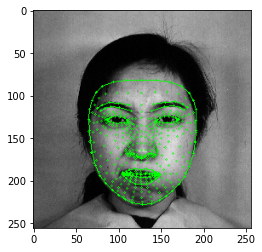

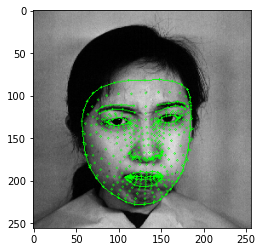

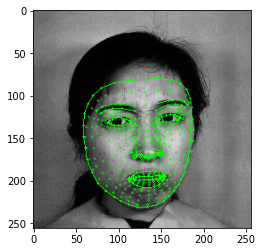

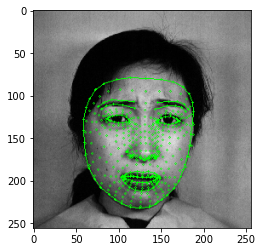

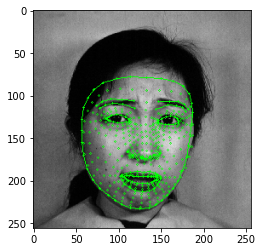

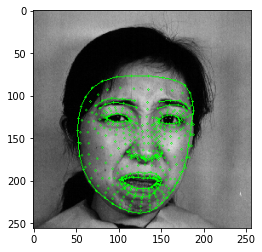

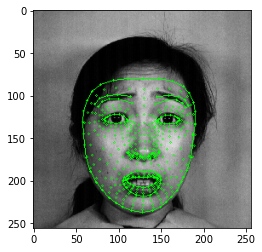

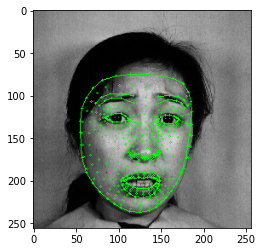

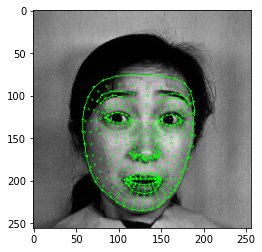

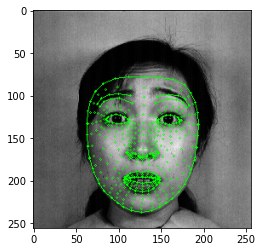

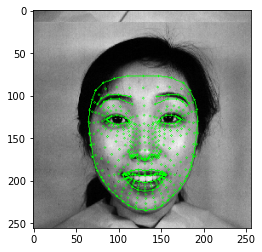

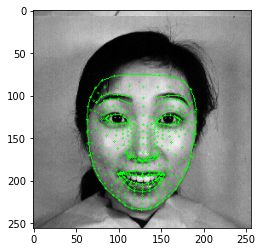

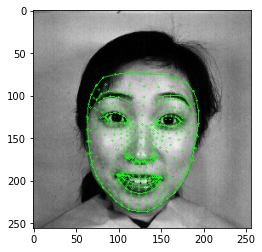

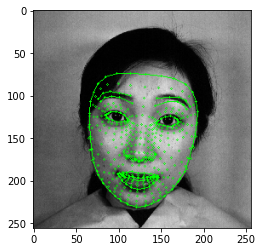

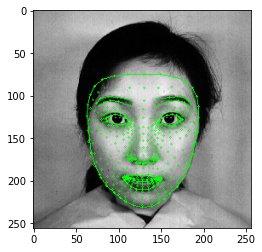

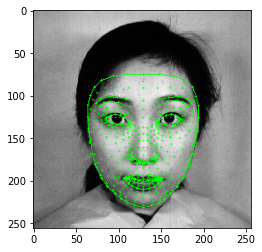

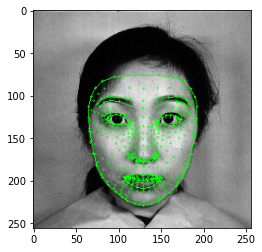

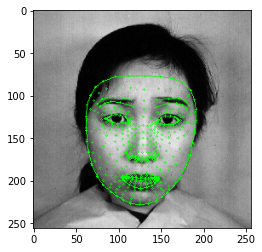

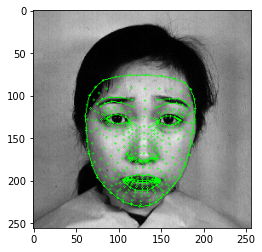

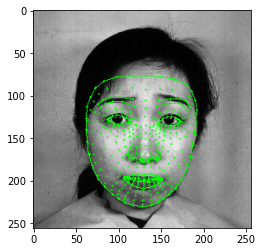

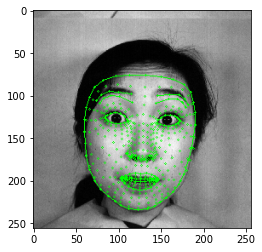

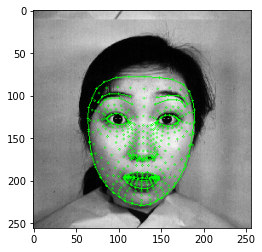

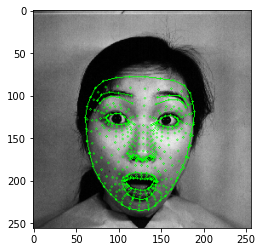

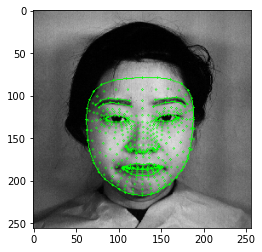

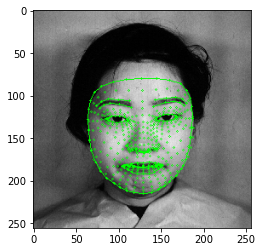

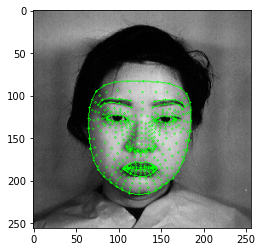

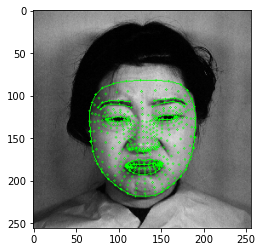

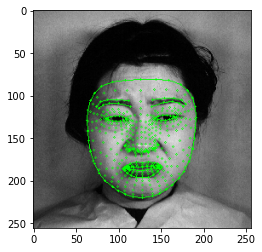

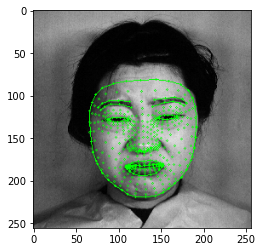

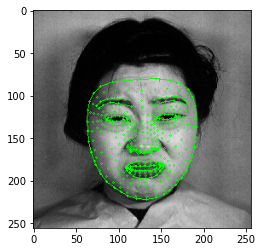

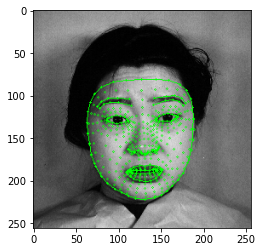

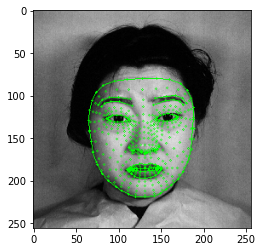

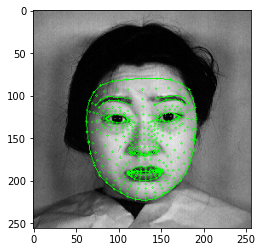

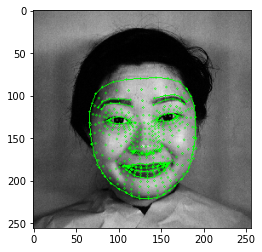

In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh

IMAGE_FILES = image_path[0:len(image_path)-1]
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    min_detection_confidence=0.5) as face_mesh:
    for idx, file in enumerate(IMAGE_FILES):
        image = cv2.imread(file)
        # Convert the BGR image to RGB before processing.
        results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Print and draw face mesh landmarks on the image.
        if not results.multi_face_landmarks:
            continue
        annotated_image = image.copy()
        for face_landmarks in results.multi_face_landmarks:
            
            mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACE_CONNECTIONS,
          landmark_drawing_spec=drawing_spec,
          connection_drawing_spec=drawing_spec)
            plt.imshow(annotated_image)
            plt.show()